# ***21022008_NguyenHuuTho***

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/NLMH_Thuchanh/Week11_Thuchanh5/temp.csv')
data

,Length_a,Width_a,Length_b,Width_b,Type
0,5.1,3.5,1.4,0.2,Iris setosa
1,4.9,3.0,1.4,0.2,Iris setosa
2,4.7,3.2,1.3,0.2,Iris setosa
3,4.6,3.1,1.5,0.2,Iris setosa
4,5.0,3.6,1.4,0.2,Iris setosa
5,5.4,3.9,1.7,0.4,Iris setosa
6,4.6,3.4,1.4,0.3,Iris setosa
7,5.0,3.4,1.5,0.2,Iris setosa
8,4.4,2.9,1.4,0.2,Iris setosa
9,4.9,3.1,1.5,0.1,Iris setosa


In [ ]:
# Chia feature và label
X = data.drop('Type', axis=1)
y = data['Type']

In [ ]:
# Chuyển đổi nhãn loại thành các số
label_map = {'Iris setosa': 0, 'Iris virginica': 1}
y = y.map(label_map)

In [ ]:
# Chia tập dữ liệu thành train set và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Huấn luyện mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Đánh giá mô hình trên tập test
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


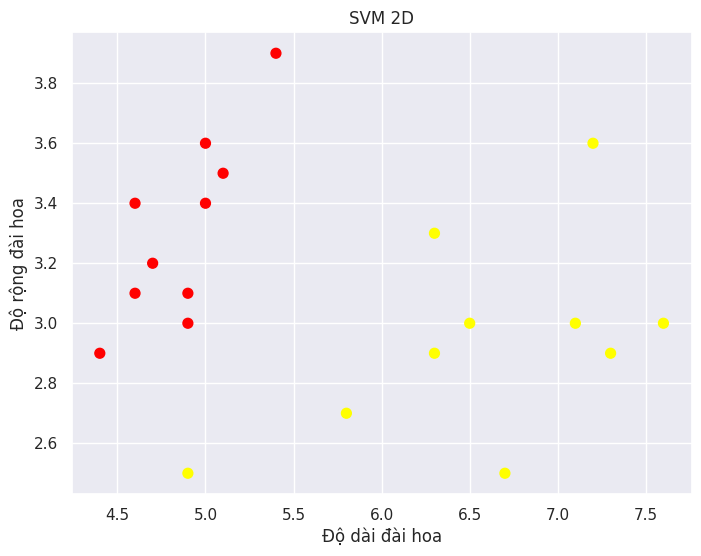

In [ ]:
#Trực quan hóa SVM 2D
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn');
plt.xlabel('Độ dài đài hoa')
plt.ylabel('Độ rộng đài hoa')
plt.title('SVM 2D')
plt.show()

In [ ]:
X.iloc[:, 0]

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    6.3
11    5.8
12    7.1
13    6.3
14    6.5
15    7.6
16    4.9
17    7.3
18    6.7
19    7.2
Name: Length_a, dtype: float64

In [ ]:
X.iloc[:, 1]

0     3.5
1     3.0
2     3.2
3     3.1
4     3.6
5     3.9
6     3.4
7     3.4
8     2.9
9     3.1
10    3.3
11    2.7
12    3.0
13    2.9
14    3.0
15    3.0
16    2.5
17    2.9
18    2.5
19    3.6
Name: Width_a, dtype: float64

In [ ]:
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Type, dtype: int64

In [ ]:
svm_model.support_vectors_

array([[5.4, 3.9, 1.7, 0.4],
       [4.6, 3.1, 1.5, 0.2],
       [4.9, 2.5, 4.5, 1.7]])

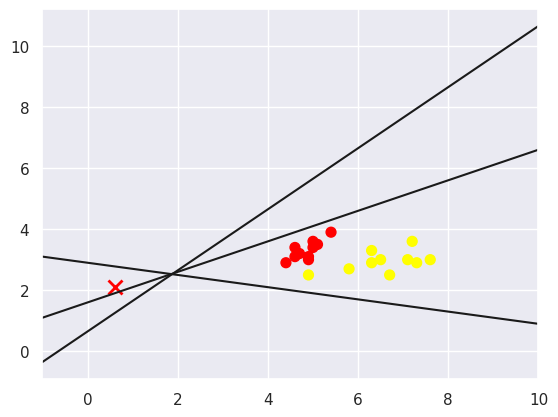

In [ ]:
xfit = np.linspace(-1, 10)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 10);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: ignored

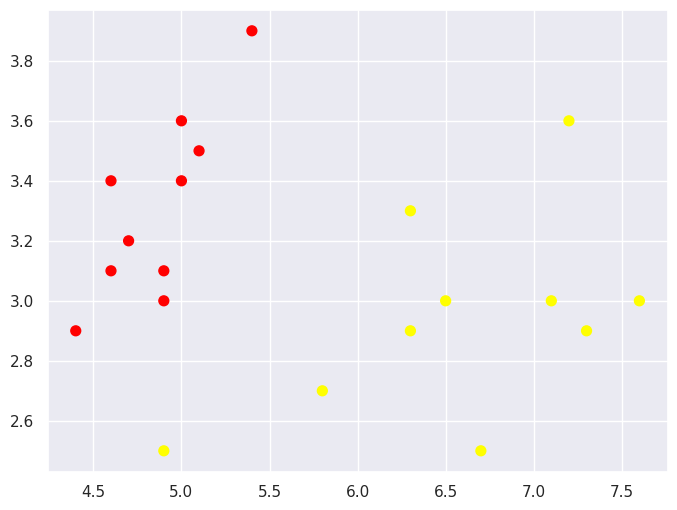

In [ ]:
# Vẽ scatter plot với nhãn loại
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

# Vẽ đường SVM tự động
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Tạo ma trận grid dự đoán
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Lấy giá trị quyết định từ mô hình SVM
Z = svm_model.decision_function(xy).reshape(XX.shape)

# Vẽ đường SVM tự động và các margin
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlim(xlim)
plt.ylim(ylim)

# Đường thẳng tạo thủ công
xfit = np.linspace(-1, 10)
for m, b, d in zip(svm_model.coef_[0], svm_model.intercept_, svm_model.support_vectors_):
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.plot(d[0], d[1], 'o', markersize=10, markerfacecolor='none', markeredgewidth=2, markeredgecolor='k')

plt.xlabel('Độ dài đài hoa')
plt.ylabel('Độ rộng đài hoa')
plt.title('SVM with Decision Boundary')
plt.show()

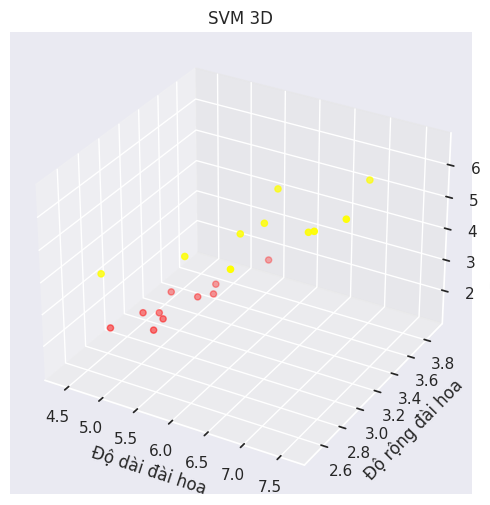

In [ ]:
# Trực quan hóa SVM 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y, cmap='autumn')
ax.set_xlabel('Độ dài đài hoa')
ax.set_ylabel('Độ rộng đài hoa')
ax.set_zlabel('Độ dài cánh hoa')
ax.set_title('SVM 3D')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/NLMH_Thuchanh/Week11_Thuchanh5/irisdata.csv')
data

,Độ dài đài hoa,Độ dài đài hoa.1,Độ dài cánh hoa,Độ rộng cánh hoa,Tên loài
0,5.1,3.5,1.4,0.2,Iris setosa
1,4.9,3.0,1.4,0.2,Iris setosa
2,4.7,3.2,1.3,0.2,Iris setosa
3,4.6,3.1,1.5,0.2,Iris setosa
4,5.0,3.6,1.4,0.2,Iris setosa
5,5.4,3.9,1.7,0.4,Iris setosa
6,4.6,3.4,1.4,0.3,Iris setosa
7,5.0,3.4,1.5,0.2,Iris setosa
8,4.4,2.9,1.4,0.2,Iris setosa
9,4.9,3.1,1.5,0.1,Iris setosa


In [ ]:
# Chia feature và label
X = data[['Độ dài đài hoa.1', 'Độ rộng đài hoa']]
y = data['Tên loài']

# Chuyển đổi nhãn loại thành các số
label_map = {'Iris setosa': 0, 'Iris virginica': 1}
y = y.map(label_map)

# Chia tập dữ liệu thành train set và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Đánh giá mô hình trên tập test
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Vẽ scatter plot với nhãn loại
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

# Vẽ đường SVM tự động
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Tạo ma trận grid dự đoán
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Lấy giá trị quyết định từ mô hình SVM
Z = svm_model.decision_function(xy).reshape(XX.shape)

# Vẽ đường SVM tự động và các margin
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlim(xlim)
plt.ylim(ylim)

plt.xlabel('Độ dài đài hoa')
plt.ylabel('Độ rộng đài hoa')
plt.title('SVM with Decision Boundary')
plt.show()


KeyError: ignored